# Load

In [27]:
import pandas as pd

In [28]:
data = pd.read_csv("data/normalized_all.csv")
metric = "Entropy"
clustering = "kmedoid"
#& (data.Model == "RF")
purity = data[(data.Metric == metric)  & (data.Clustering == clustering)].drop(["Metric", "Instances", "Clustering"], axis = 1)

In [29]:
purity.head()

,Model,Xai,Percentage,dataset_id,value
1944,RF,Raw,0.01,0,0.799426
1945,RF,Raw,0.01,1,0.009228
1946,RF,Raw,0.01,2,0.713140
1947,RF,Raw,0.01,3,0.740925
1948,RF,Raw,0.01,4,0.675331


In [30]:
purity["block"] = purity.apply(lambda row : str(row["Percentage"]) + "-" + str(row["dataset_id"]), axis=1)
purity["group"] = purity.apply(lambda row : str(row["Xai"]) + "-" + str(row["Model"]), axis=1)
data["group"] = data.apply(lambda row : str(row["Xai"]) + "-" + str(row["Model"]), axis=1)

{'markers': [<matplotlib.collections.PathCollection at 0x7fe3590302e0>,
 'elbows': [<matplotlib.lines.Line2D at 0x7fe359030070>,
 'labels': [Text(0.20153846153846153, -3, 'SHAP-RF (0.21)'),
  Text(0.20153846153846153, -4, 'Spearman-RF (0.22)'),
  Text(0.20153846153846153, -5, 'SHAP-SVM (0.33)'),
  Text(0.20153846153846153, -6, 'SHAP-LR (0.48)'),
  Text(0.20153846153846153, -7, 'Spearman-SVM (0.51)'),
  Text(0.20153846153846153, -8, 'LIME-RF (0.56)'),
  Text(0.766054131054131, -3, '(0.76) LIME-LR'),
  Text(0.766054131054131, -4, '(0.73) Raw-SVM'),
  Text(0.766054131054131, -5, '(0.73) Raw-RF'),
  Text(0.766054131054131, -6, '(0.73) Raw-LR'),
  Text(0.766054131054131, -7, '(0.67) LIME-SVM'),
  Text(0.766054131054131, -8, '(0.58) Spearman-LR')],
 'crossbars': [[<matplotlib.lines.Line2D at 0x7fe359023520>],
  [<matplotlib.lines.Line2D at 0x7fe359023e20>]]}

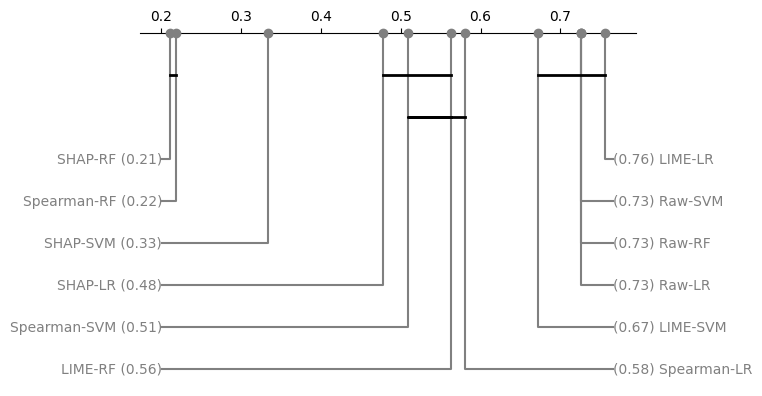

In [31]:
import scikit_posthocs as sp
test_results = sp.posthoc_nemenyi_friedman(purity, y_col='value', block_col='block', group_col='group', melted=True)
avg_rank = purity.groupby('block').value.rank(pct=True).groupby(data.group).mean()
sp.critical_difference_diagram(avg_rank, test_results, elbow_props={'color': 'gray'},)

In [32]:
test_results

,Raw-RF,SHAP-RF,Spearman-RF,LIME-RF,Raw-SVM,SHAP-SVM,Spearman-SVM,LIME-SVM,Raw-LR,SHAP-LR,Spearman-LR,LIME-LR
Raw-RF,1.000000,0.001,0.001000,0.001000,0.900000,0.001000,0.001000,0.700382,0.900000,0.001000,0.001000,0.900000
SHAP-RF,0.001000,1.000,0.900000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
Spearman-RF,0.001000,0.900,1.000000,0.001000,0.001000,0.002103,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
LIME-RF,0.001000,0.001,0.001000,1.000000,0.001000,0.001000,0.712467,0.004730,0.001000,0.094041,0.900000,0.001000
Raw-SVM,0.900000,0.001,0.001000,0.001000,1.000000,0.001000,0.001000,0.700382,0.900000,0.001000,0.001000,0.900000
SHAP-SVM,0.001000,0.001,0.002103,0.001000,0.001000,1.000000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
Spearman-SVM,0.001000,0.001,0.001000,0.712467,0.001000,0.001000,1.000000,0.001000,0.001000,0.900000,0.296933,0.001000
LIME-SVM,0.700382,0.001,0.001000,0.004730,0.700382,0.001000,0.001000,1.000000,0.700382,0.001000,0.046070,0.099311
Raw-LR,0.900000,0.001,0.001000,0.001000,0.900000,0.001000,0.001000,0.700382,1.000000,0.001000,0.001000,0.900000
SHAP-LR,0.001000,0.001,0.001000,0.094041,0.001000,0.001000,0.900000,0.001000,0.001000,1.000000,0.011958,0.001000


# Moyennes >0,8 / <0,8

In [33]:
import pickle
dico_models = pickle.load(file=open("models/Models.pckl", "rb"))


In [34]:
columns = ["did", "Model", "nb_true", "nb_false", "accuracy"]
data = []

for did, o in dico_models.items():
    lines = []
    for model, e in o.items():
        line = [did, model, e["nb_true"], e["nb_false"], e["balanced-acc"]]
        lines.append(line)
    max = 0
    max_line = []
    for line in lines:
        if line[4] > max:
            max = line[4]
            max_line = line
    data.append(max_line)


In [35]:
import pandas as pd
df = pd.DataFrame(data, columns = columns)
good = df[df["accuracy"] > 0.8]
bad = df[df["accuracy"] <= 0.8]
(df.accuracy.min())

0.499799176624159

(array([ 3.,  2.,  2.,  3.,  1.,  3.,  1.,  7.,  3., 15.]),
 array([0.49979918, 0.54981926, 0.59983934, 0.64985942, 0.69987951,
        0.74989959, 0.79991967, 0.84993975, 0.89995984, 0.94997992,
        1.        ]),
 <BarContainer object of 10 artists>)

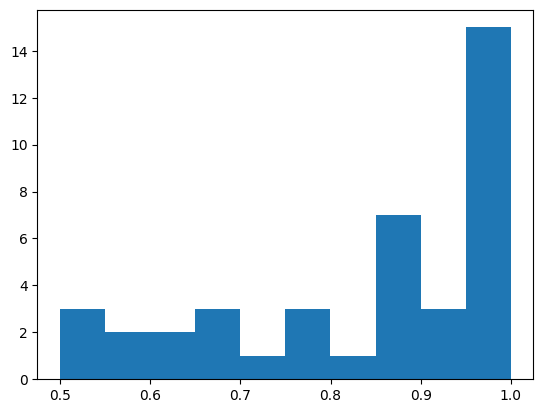

In [36]:
from matplotlib import pyplot as plt
plt.hist(df.accuracy)

In [37]:
bad.accuracy.max()

0.7861591987271142

In [38]:
df.nb_false.sum() / (df.nb_true.sum() + df.nb_false.sum())

0.14351157527336186

In [39]:
bad.nb_true.sum() / (bad.nb_true.sum() + bad.nb_false.sum())

0.7196652719665272